In [0]:
!pip install missingno

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from google.colab import files

In [0]:
data_file = files.upload()

Saving feedback.csv to feedback.csv


In [0]:
df = pd.read_csv('feedback.csv', error_bad_lines=False)
df.head(n=10)

b'Skipping line 397: expected 7 fields, saw 13\nSkipping line 1341: expected 7 fields, saw 11\nSkipping line 2171: expected 7 fields, saw 18\nSkipping line 2202: expected 7 fields, saw 11\nSkipping line 2675: expected 7 fields, saw 41\nSkipping line 2681: expected 7 fields, saw 8\nSkipping line 7169: expected 7 fields, saw 8\nSkipping line 8955: expected 7 fields, saw 28\nSkipping line 8978: expected 7 fields, saw 9\nSkipping line 9646: expected 7 fields, saw 8\nSkipping line 9885: expected 7 fields, saw 15\nSkipping line 11128: expected 7 fields, saw 8\nSkipping line 11157: expected 7 fields, saw 10\nSkipping line 12466: expected 7 fields, saw 10\nSkipping line 13016: expected 7 fields, saw 11\nSkipping line 13448: expected 7 fields, saw 19\nSkipping line 14826: expected 7 fields, saw 8\nSkipping line 15644: expected 7 fields, saw 22\nSkipping line 18055: expected 7 fields, saw 8\nSkipping line 18260: expected 7 fields, saw 8\n'


rating  product_id  \
1.0 8342  Александр  2017-04-12   
5.0 8342      Елена  2015-08-04   
    5311     Леонид  2017-07-16   
4.0 5311     Сергей  2017-06-28   
5.0 5311      Ольга  2017-01-21   
4.3 5311     yubobr  2016-12-30   
5.0 5311      Ольга  2015-10-30   
    5311      Ирина  2011-03-21   
4.7 5312    Алексей  2017-07-19   
5.0 5312     Галина  2016-08-29   

                                                       name  \
1.0 8342                           6 входов, предохранитель   
5.0 8342  Я являюсь пользователем Пилотов уже больше 10 ...   
    5311                                       хорошо мелет   
4.0 5311                                         Компактная   
5.0 5311                                    Цена и качество   
4.3 5311                Все было хорошо, пока она работала.   
5.0 5311  хорошая. почти два года. корпус внушающий дове...   
    5311  Отличная кофемолка во всех отношениях: качеств...   
4.7 5312                  простота, надежность, низкая цена   
5.0 5312  Плюсы: компактная, удобна в обращении, не кокс...   

                                                       date  \
1.0 8342  искрит при включении любого устройства в любой...   
5.0 8342                                                NaN   
    5311                             маркий, остаются следы   
4.0 5311                                           Не нашел   
5.0 5311                                                Нет   
4.3 5311                                    Недолговечность   
5.0 5311                                                NaN   
    5311                                                NaN   
4.7 5312                                                нет   
5.0 5312                                                NaN   

                                                   feedback  
1.0 8342  Данный сетевой фильтр начал искрить после неде...  
5.0 8342                                                NaN  
    5311              Использую 1 месяц. Пока  проблем нет.  
4.0 5311  Работает на ура. В инструкции четко написано, ...  
5.0 5311  В использовании 2 месяца перемалывает быстро и...  
4.3 5311  Отработала исправно пять лет. А потом перестал...  
5.0 5311                                                NaN  
    5311                                                NaN  
4.7 5312  При отсутствии "наворотов" делает свою работу ...  
5.0 5312                                                NaN

Исходя из отображения таблицы, на фидбэк выделено 3 поля, для начала стоит разобраться имеет ли это какое-то значние

In [0]:
df = pd.read_csv('feedback.csv', sep=',', names=['rating','product_id','name','date','x1', 'x2','feedback'], skiprows=1)
df.head(n=10)

Я подозреваю, что х1 и х2 судя по своему содержанию, отвечают за отзывы о положительных качествах и недостатках соответсвтенно, рассмотрим более детально

In [0]:
df.x1.unique()[0:50]

In [0]:
df.x2.unique()[0:50]

Вторая колонка очень похожа на ответ на вопрос о том, какие недостатки есть у продукта

In [0]:
df = pd.read_csv('feedback.csv', sep=',', names=['rating','product_id','name','date','pros', 'cons','feedback'], skiprows=1)

In [0]:
df.head()

,rating,product_id,name,date,pros,cons,feedback,pros_length,cons_length
0,rating,product_id,name,date,feedback,NaN,NaN,8,0
1,1,8342,Александр,2017-04-12,"6 входов, предохранитель",искрит при включении любого устройства в любой...,Данный сетевой фильтр начал искрить после неде...,24,59
2,5,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...,NaN,NaN,690,0
3,5,5311,Леонид,2017-07-16,хорошо мелет,"маркий, остаются следы",Использую 1 месяц. Пока проблем нет.,12,22
4,4,5311,Сергей,2017-06-28,Компактная,Не нашел,"Работает на ура. В инструкции четко написано, ...",10,8


In [0]:
df.pros.replace(np.nan, '', inplace=True)
df.cons.replace(np.nan, '', inplace=True)
df['pros_length'] = [len(text) for text in df.pros]
df['cons_length'] = [len(text) for text in df.cons]

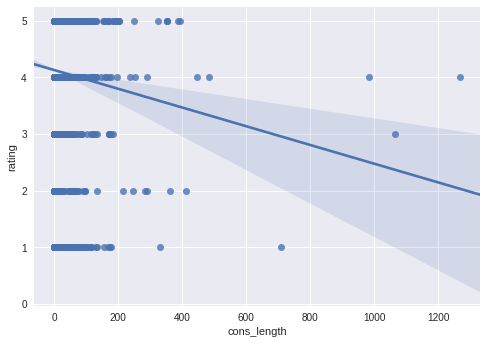

In [0]:
sns.regplot(x = df.cons_length, y = df.rating)

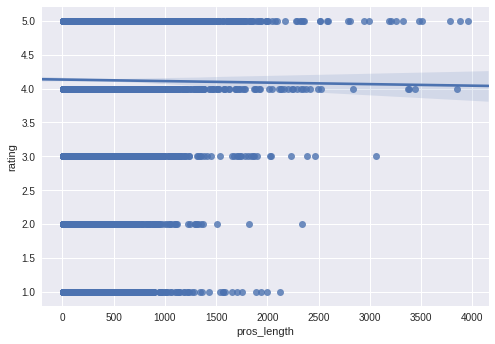

In [0]:
sns.regplot(x = df.pros_length, y = df.rating)

In [0]:
df.rating = np.round(df.rating)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


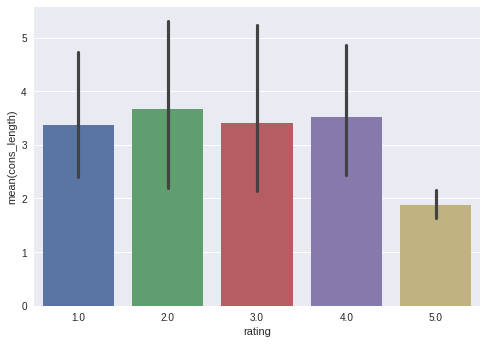

In [0]:
sns.barplot(x = df.rating, y=df.cons_length)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


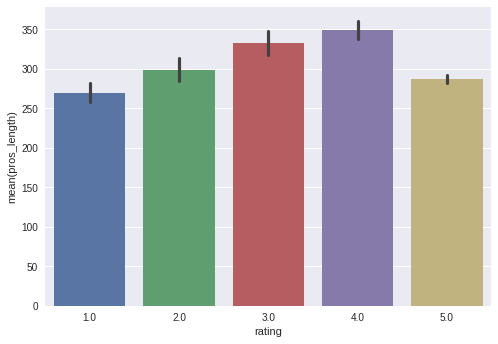

In [0]:
sns.barplot(x = df.rating, y=df.pros_length)

In [0]:
df.cons_length

In [0]:
df.corr()

,rating,product_id,pros_length,cons_length
rating,1.000000,0.044667,-0.005022,-0.028792
product_id,0.044667,1.000000,-0.002294,0.015371
pros_length,-0.005022,-0.002294,1.000000,-0.074627
cons_length,-0.028792,0.015371,-0.074627,1.000000


так как никакой взаимосвязи с не было обнаружено, значит скорее всего разделение на 3 колонки фидбэка имеет чисто техническую причину, тогда возможно будет лучше соединить их все в одну

In [0]:
df.feedback.replace(np.nan, '', inplace=True)

In [0]:
df.feedback = df.pros + ' ' + df.cons + ' ' + df.feedback

In [0]:
df = df.drop(columns=['cons_length', 'pros_length', 'pros', 'cons'])

In [0]:
df.feedback[0]

'6 входов, предохранитель искрит при включении любого устройства в любой сетевой вход Данный сетевой фильтр начал искрить после недели эксплуатации. Защитить компьютер от перепада напряжения, я думаю, он вряд ли сможет.'

In [0]:
df.head(n = 10)

,rating,product_id,name,date,feedback
0,1.0,8342,Александр,2017-04-12,"6 входов, предохранитель искрит при включении ..."
1,5.0,8342,Елена,2015-08-04,Я являюсь пользователем Пилотов уже больше 10 ...
2,5.0,5311,Леонид,2017-07-16,"хорошо мелет маркий, остаются следы Использую ..."
3,4.0,5311,Сергей,2017-06-28,Компактная Не нашел Работает на ура. В инструк...
4,5.0,5311,Ольга,2017-01-21,Цена и качество Нет В использовании 2 месяца п...
5,4.3,5311,yubobr,2016-12-30,"Все было хорошо, пока она работала. Недолговеч..."
6,5.0,5311,Ольга,2015-10-30,хорошая. почти два года. корпус внушающий дове...
7,5.0,5311,Ирина,2011-03-21,Отличная кофемолка во всех отношениях: качеств...
8,4.7,5312,Алексей,2017-07-19,"простота, надежность, низкая цена нет При отсу..."
9,5.0,5312,Галина,2016-08-29,"Плюсы: компактная, удобна в обращении, не кокс..."


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


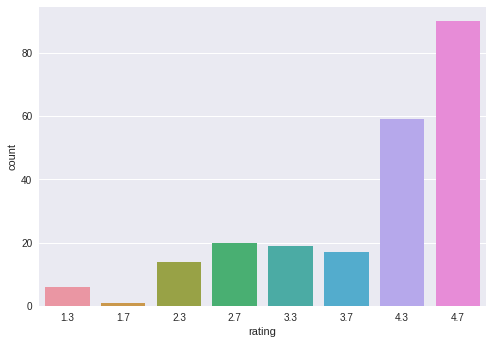

In [0]:
sns.countplot(df.rating[df.rating % 1 != 0])

In [0]:
sum(df.rating % 1 != 0)

226

In [0]:
226/len(df)

0.01232144804274343